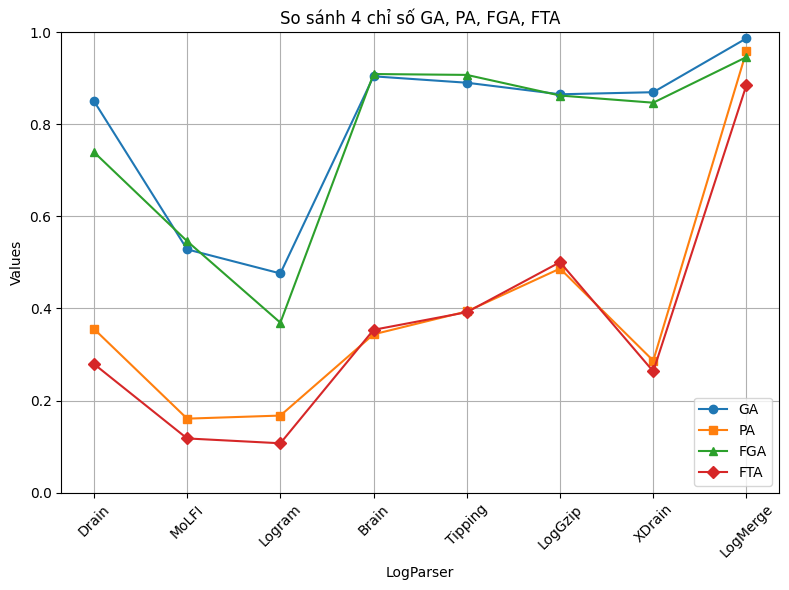

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Đọc file
df = pd.read_csv("../../benchmark/total_benchmark/evaluation.csv")

metrics = ['GA', 'PA', 'FGA', 'FTA']

df_clean = df.dropna(subset=metrics)

parser_order = {
    'Drain': 2016,
    'MoLFI': 2018,
    'Logram': 2020,
    'Brain': 2023,
    'Tipping': 2024,
    'XDrain': 2025,
    'LogGzip': 2025,
    'LogMerge': 2026,
}

df_clean = df_clean[df_clean['logparser'].isin(parser_order.keys())]

df_clean['year'] = df_clean['logparser'].map(parser_order)

df_sorted = df_clean.sort_values(by='year')

plt.figure(figsize=(8, 6))
plt.plot(df_sorted['logparser'], df_sorted['GA'], marker='o', label='GA')
plt.plot(df_sorted['logparser'], df_sorted['PA'], marker='s', label='PA')
plt.plot(df_sorted['logparser'], df_sorted['FGA'], marker='^', label='FGA')
plt.plot(df_sorted['logparser'], df_sorted['FTA'], marker='D', label='FTA')

plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.title('So sánh 4 chỉ số GA, PA, FGA, FTA')
plt.ylabel('Values')
plt.xlabel('LogParser')
plt.tight_layout()
plt.show()


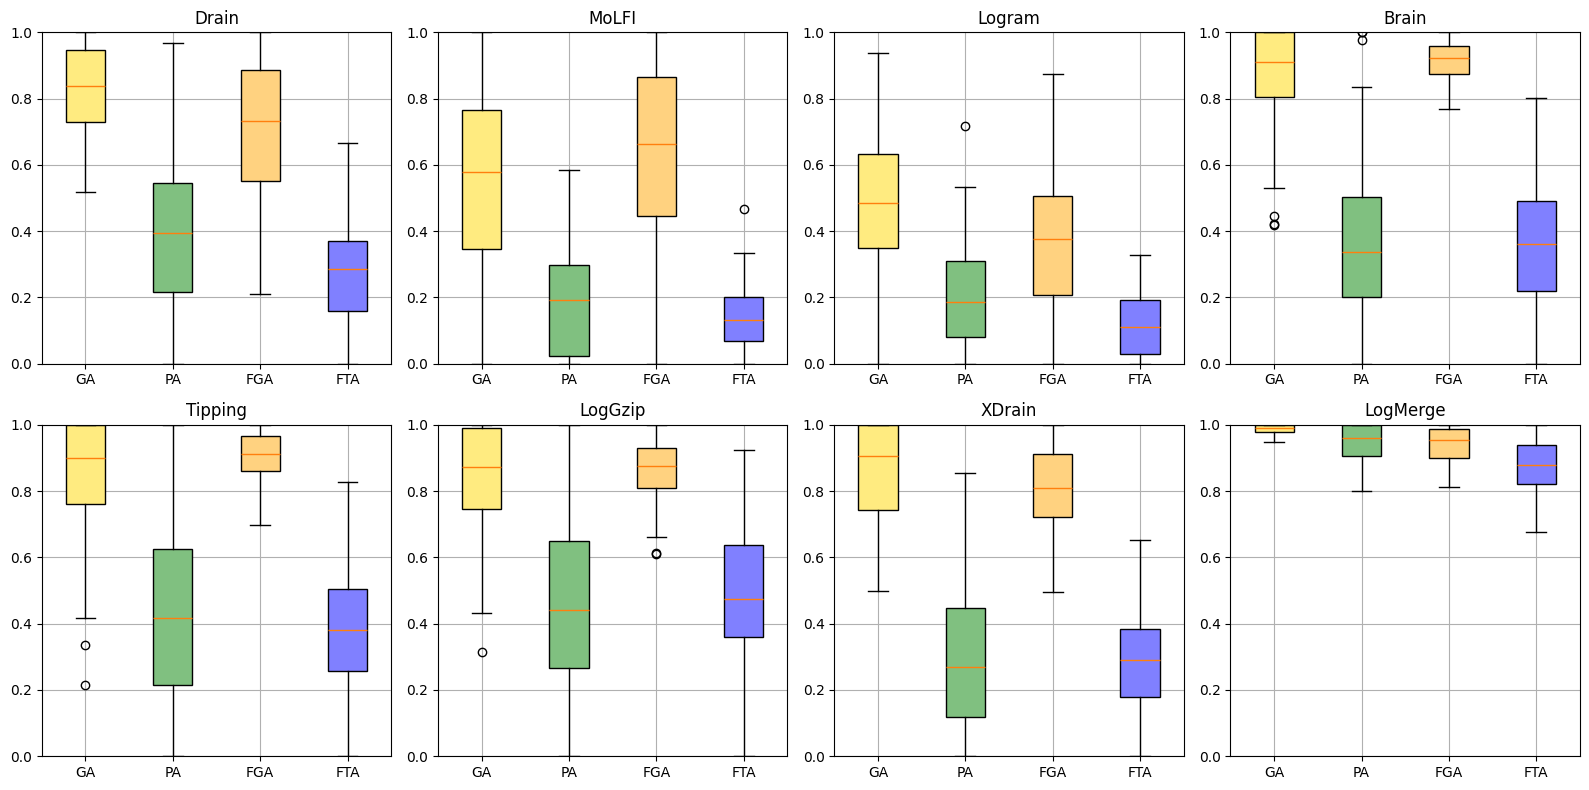

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):
    # color: tên màu hoặc mã hex
    # amount: 0 (không đổi) đến 1 (trắng hoàn toàn)
    c = np.array(mcolors.to_rgb(color))
    white = np.array([1,1,1])
    return (1 - amount) * c + amount * white

df = pd.read_csv("../../benchmark/total_benchmark/evaluation.csv")

metrics = ['GA', 'PA', 'FGA', 'FTA']
parser_order = {
    'Drain': 2016,
    'MoLFI': 2018,
    'Logram': 2020,
    'Brain': 2023,
    'Tipping': 2024,
    'XDrain': 2025,
    'LogGzip': 2025,
    'LogMerge': 2026,
}

df_clean = df[df['logparser'].isin(parser_order.keys())].dropna(subset=metrics + [f"{m}_std" for m in metrics])
df_clean['year'] = df_clean['logparser'].map(parser_order)
df_sorted = df_clean.sort_values(by='year')

n_samples = 100

# Vẽ boxplot
num_parsers = len(df_sorted)
fig, axes = plt.subplots(nrows=num_parsers // 4 + (num_parsers % 4 != 0), ncols=4, figsize=(16, 8))
axes = axes.flatten()

colors = ['gold', 'green', 'orange', 'blue']  # GA, PA, FGA, FTA
light_colors = [lighten_color(c, 0.5) for c in colors]

for i, (_, row) in enumerate(df_sorted.iterrows()):
    data = []
    for metric in metrics:
        mean = row[metric]
        std = row[f"{metric}_std"]
        samples = np.random.normal(loc=mean, scale=std, size=n_samples)
        samples = np.clip(samples, 0, 1)
        data.append(samples)

    bp = axes[i].boxplot(data, patch_artist=True, tick_labels=metrics)

    for patch, color in zip(bp['boxes'], light_colors):
        patch.set_facecolor(color)

    axes[i].set_title(row['logparser'])
    axes[i].set_ylim(0, 1)
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
